In [5]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-64-ef1e4e80421c>:21: RuntimeWarning: divide by zero encountered in double_scalars
  C = Q/(2*np.pi*D*t)*np.exp(-y**2/(4*D*t))
<ipython-input-64-ef1e4e80421c>:21: RuntimeWarning: invalid value encountered in double_scalars
  C = Q/(2*np.pi*D*t)*np.exp(-y**2/(4*D*t))


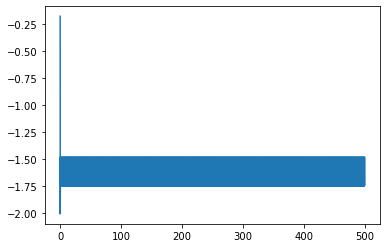

In [64]:
r = 10
b = 0.8
l = 0.4
phi = np.pi/12
tp = np.pi/12
#tp = np.pi/180*500
Q = 1.2*10**(-6)
D = 0.01
#t = 1
Cmax = 1.2*10**(-10)
k = 100

def a(tv):
    alx = r*np.cos(phi)+b/2*np.cos(tv)+l*np.cos(tv+np.pi/2)
    aly = r*np.sin(phi)+b/2*np.sin(tv)+l*np.sin(tv+np.pi/2)
    arx = r*np.cos(phi)+b/2*np.cos(tv)+l*np.cos(tv-np.pi/2)
    ary = r*np.sin(phi)+b/2*np.sin(tv)+l*np.sin(tv-np.pi/2)
    return alx, aly, arx, ary

def S(y,t):
    C = Q/(2*np.pi*D*t)*np.exp(-y**2/(4*D*t))
    S = np.arctan(k*C/Cmax)/(np.pi/2)
    return S

tv = np.pi/36

tvs = []
ts = np.arange(0,500,.02)
for t in ts:
    alx, aly, arx, ary = a(tv)
    rl = (alx**2+aly**2)**(1/2)
    if S(aly,t) > S(ary,t):
        tv = tv + tp
    else:
        tv = tv - tp
    tvs.append(tv)
    
fig = plt.plot(ts, tvs)
#Cs = [C(2,t) for t in np.arange(0,4000,1)]
#fig2 = plt.plot(np.arange(0,4000,1),Cs)

#Cs = [C(r,500) for r in np.arange(0,10,.1)]
#fig2 = plt.plot(np.arange(0,10,.1),Cs)


##Do we want to include error??

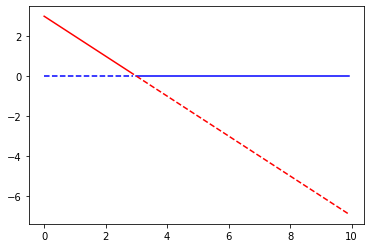

In [35]:
N = 3
ba = np.arange(0,10,0.1)
z1 = ba[0:list(ba).index(N)]*0
z2 = N-ba[0:list(ba).index(N)]
z3 = ba[list(ba).index(N):100]*0
z4 = N-ba[list(ba).index(N):100]

plt.plot(ba[0:list(ba).index(N)],z1,'b--')
plt.plot(ba[0:list(ba).index(N)],z2,'r-')
plt.plot(ba[list(ba).index(N):100],z3, 'b-')
plt.plot(ba[list(ba).index(N):100],z4,'r--')


Text(0, 0.5, 'z*')

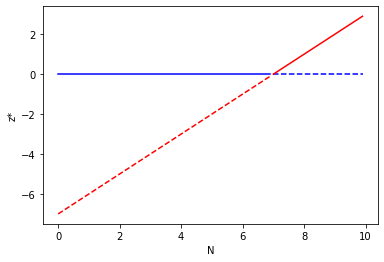

In [41]:
N = np.arange(0,10,0.1)
ba = 7

z1 = N[0:list(N).index(ba)]*0
z3 = N[list(N).index(ba):100]*0
z5 = N[0:list(N).index(ba)]-ba
z6 = N[list(N).index(ba):100]-ba

plt.plot(N[0:list(N).index(ba)],z1,'b-')
plt.plot(N[0:list(N).index(ba)],z5,'r--')
plt.plot(N[list(N).index(ba):100],z3, 'b--')
plt.plot(N[list(N).index(ba):100],z6,'r-')
plt.xlabel('N')
plt.ylabel('z*')

8.932730775214308


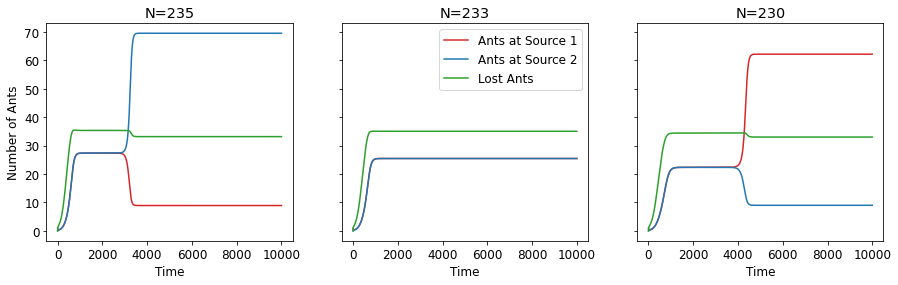

In [163]:
from scipy.integrate import odeint
import matplotlib

font = {'size' : 12}
matplotlib.rc('font',**font)

a = 0.001
g = 24.3
b = 0.1
p = 0.033
c = 0.018
N = 235

def F(Z,t):
    x1,x2,E = Z
    f1 = (x1/(g+x1))
    f2 = (x2/(g+x2))
    f12 = (x1+x2)/(g+x1+x2)
    x1dot = a*x1*x1/(g+x1)*(N-x1-x2-E)-b*x1+c*E
    x2dot = a*x2*x2/(g+x2)*(N-x1-x2-E)-b*x2+c*E
    Edot = a*(x1+x2)*(1-(x1+x2)/(g+x1+x2))*(N-x1-x2-E)-p*E-2*c*E
    return [x1dot,x2dot,Edot]
    #return[a*x1*x1/(g+x1)*(N-x1-x2-E)-b*x1+c*E,a*x2*x2/(g+x2)*(N-x1-x2-E)-b*x2+c*E,a*(x1+x2)*(1-(x1+x2)/(g+x1+x2))*(N-x1-x2-E)-p*E-2*c*E]

    
tvec = np.linspace(0,10000,100000)
y0 = [1,0,0]
zs1 = odeint(F,y0,tvec)
print(zs1[-1,0])

fig, ax = plt.subplots(1,3,sharey=True, figsize=(15,4))
ax[0].plot(tvec,zs1[:,0],c='tab:red',label='Ants at Source 1')
ax[0].plot(tvec,zs1[:,1],c='tab:blue',label='Ants at Source 2')
ax[0].plot(tvec,zs1[:,2],c='tab:green',label='Lost Ants')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Number of Ants')
ax[0].set_title('N=235')
#plt.xlim([0, 100])
#plt.ylim([0,1])
#plt.legend(fontsize=9)
#plt.savefig('traj_235.png')

N=233
zs2 = odeint(F,y0,tvec)

ax[1].plot(tvec,zs2[:,0],c='tab:red',label='Ants at Source 1')
ax[1].plot(tvec,zs2[:,1],c='tab:blue',label='Ants at Source 2')
ax[1].plot(tvec,zs2[:,2],c='tab:green',label='Lost Ants')
ax[1].set_xlabel('Time')
#ax[1].set_ylabel('Number of Ants')
ax[1].set_title('N=233')
#ax[1].set_ylim([0,70])
ax[1].legend()

N=230
zs3 = odeint(F,y0,tvec)

ax[2].plot(tvec,zs3[:,0],c='tab:red',label='Ants at Source 1')
ax[2].plot(tvec,zs3[:,1],c='tab:blue',label='Ants at Source 2')
ax[2].plot(tvec,zs3[:,2],c='tab:green',label='Lost Ants')
ax[2].set_xlabel('Time')
#ax[2].set_ylabel('Number of Ants')
ax[2].set_title('N=230')

plt.savefig('traj_y01.png')

#fig3 = plt.figure()
#plt.plot(zs1[:,0],zs1[:,2])

5.453640737058042


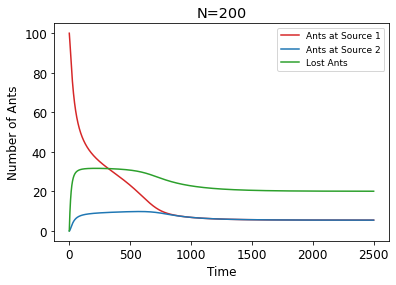

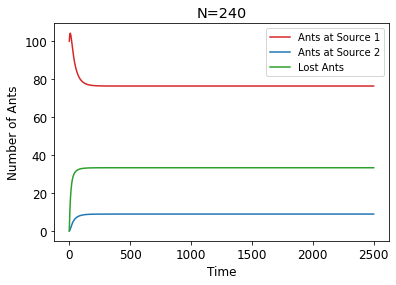

In [145]:
font = {'size' : 12}
matplotlib.rc('font',**font)
N=215
tvec = np.linspace(0,2500,100000)
y0 = [100,0,0]
zs1 = odeint(F,y0,tvec)
print(zs1[-1,0])


fig = plt.figure()
plt.plot(tvec,zs1[:,0],c='tab:red',label='Ants at Source 1')
plt.plot(tvec,zs1[:,1],c='tab:blue',label='Ants at Source 2')
plt.plot(tvec,zs1[:,2],c='tab:green',label='Lost Ants')
plt.xlabel('Time')
plt.ylabel('Number of Ants')
plt.title('N=200')
#plt.xlim([0, 100])
#plt.ylim([0,1])
plt.legend(fontsize=9)
#plt.savefig('traj_235.png')

N=240
zs2 = odeint(F,y0,tvec)

fig2 = plt.figure()
plt.plot(tvec,zs2[:,0],'tab:red',label='Ants at Source 1')
plt.plot(tvec,zs2[:,1],'tab:blue',label='Ants at Source 2')
plt.plot(tvec,zs2[:,2],'tab:green',label='Lost Ants')
plt.xlabel('Time')
plt.ylabel('Number of Ants')
#plt.xlim([0, 100])
#plt.ylim([0,70])
plt.title('N=240')
plt.legend(fontsize=10)
#plt.savefig('traj_233.png')

[38.11117798610143, 38.41581908954194, 48.21393273351302, 38.666010612740834, 48.8966487868292, 49.6812345795219, 49.90317697898287]


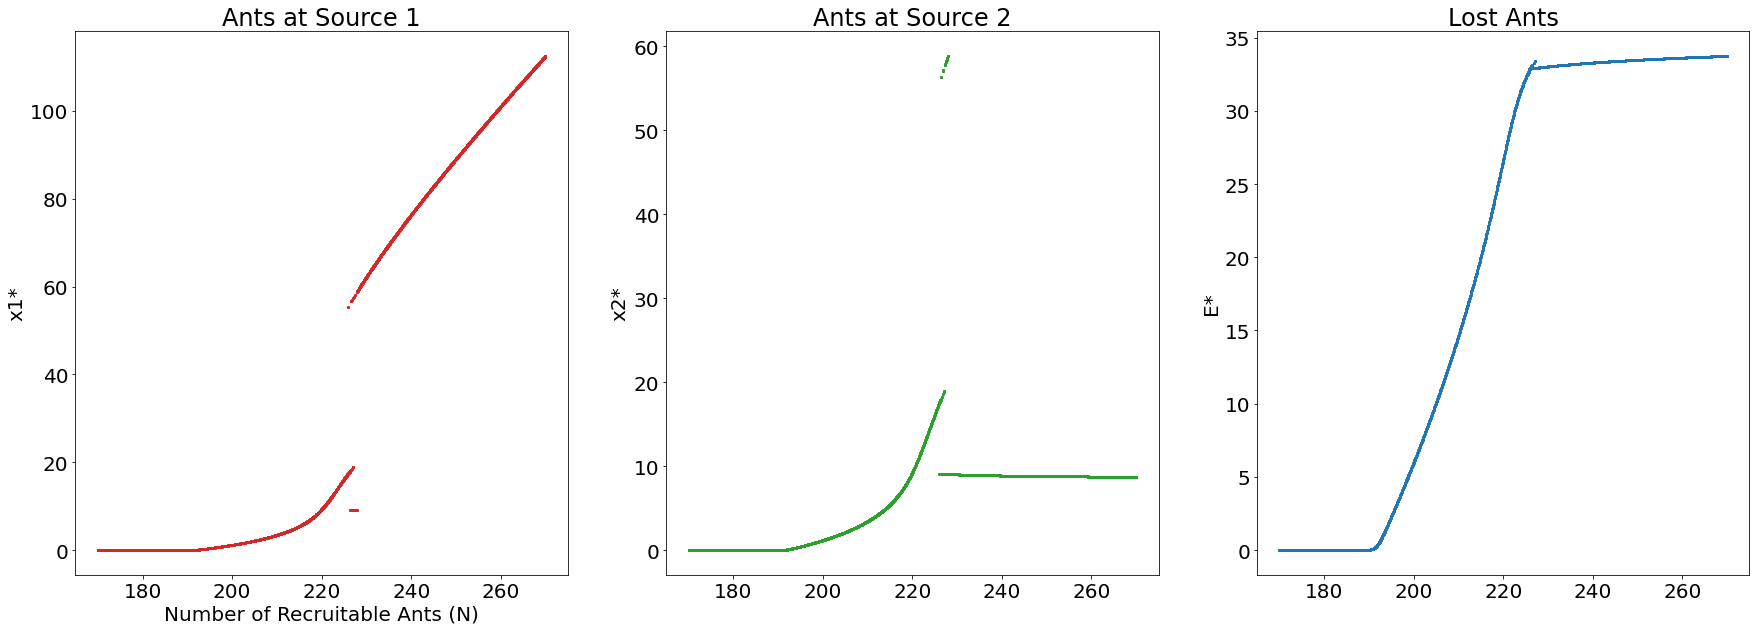

In [158]:
font = {'size' : 20}
matplotlib.rc('font',**font)

tvec = np.linspace(0,10000,10000)
y0 = [2,0,0]

Ns = np.linspace(170,270,1500)

fig,ax = plt.subplots(1,3,figsize=(30,10))

lastpoints = []
for N in Ns:
    N = N
    zs = odeint(F,y0,tvec)
    
    lastpoints.append(zs[-1,0])
    
    ax[0].scatter(N*np.ones(100),zs[9900:10000,0],s=0.4, c='tab:red', label='Ants at Source 1')
    ax[1].scatter(N*np.ones(100),zs[9900:10000,1],s=0.4, c='tab:green', label='Ants at Source 2')
    ax[2].scatter(N*np.ones(100),zs[9900:10000,2],s=0.4, c='tab:blue', label='Lost Ants')

differences = [lastpoints[int(i)]-lastpoints[int(i-1)] for i in np.linspace(1,999,999)]
#plt.xlabel('$N$', fontsize=30)         # label for x-axis
#plt.ylabel('$x1$', fontsize=30)      # label for y-axis
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
#plt.legend()
ax[0].set_title('Ants at Source 1')
ax[1].set_title('Ants at Source 2')
ax[2].set_title('Lost Ants')
ax[0].set_xlabel('Number of Recruitable Ants (N)')
ax[0].set_ylabel('x1*')
ax[1].set_ylabel('x2*')
ax[2].set_ylabel('E*')
print([diff for diff in differences if diff > 30])
#plt.legend(["Ants at Source 1","Ants at Source 2","Lost Ants"])
plt.savefig('y0_2_bif2.png')
plt.show()                      # needed in order to actually produce the plot for you to see

In [160]:
print(Ns[differences.index(49.90317697898287)])
print(np.linspace(1,5,5))

227.90527018012008
[1. 2. 3. 4. 5.]


[25.409334403162063]


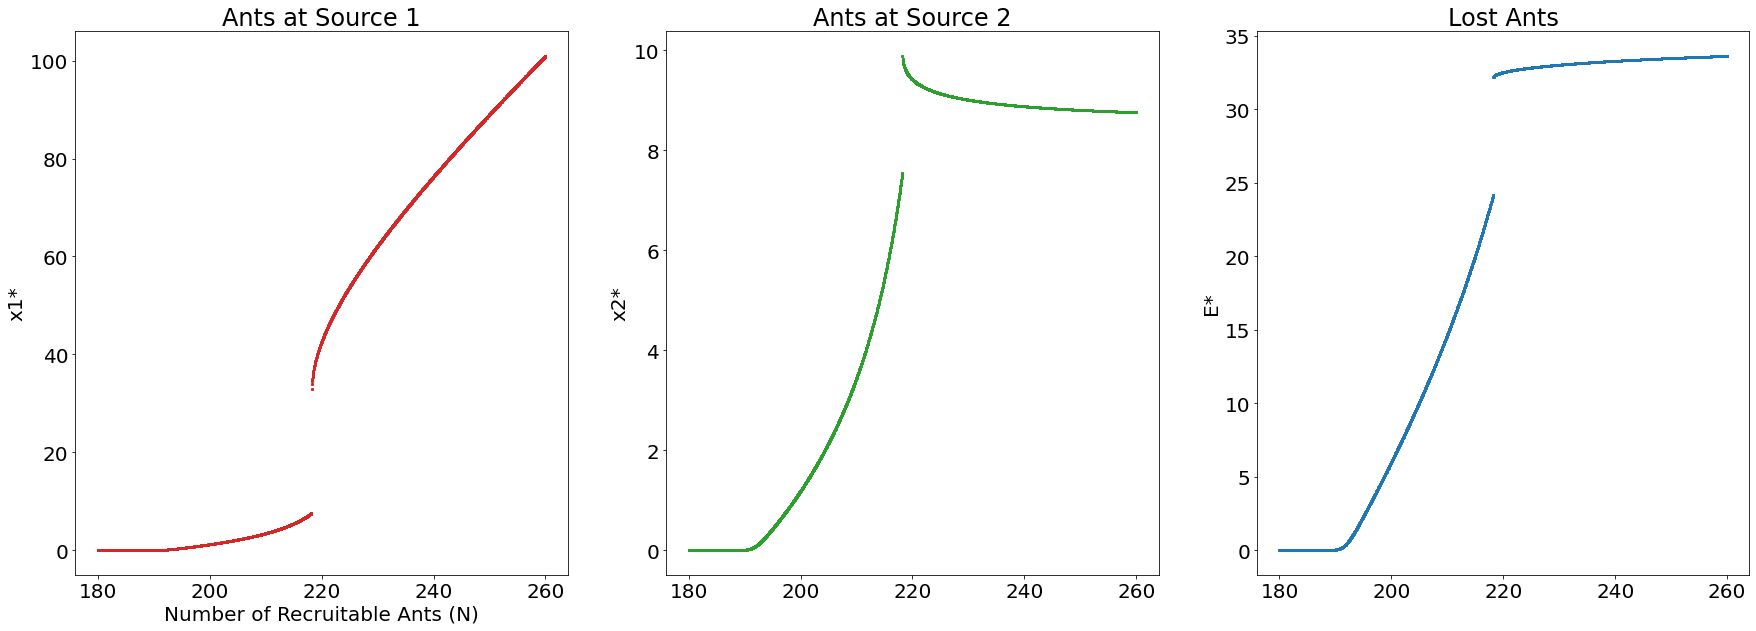

In [132]:
font = {'size' : 20}
matplotlib.rc('font',**font)

tvec = np.linspace(0,10000,10000)
y0 = [100,0,0]

Ns = np.linspace(180,260,2000)

fig,ax = plt.subplots(1,3,figsize=(30,10))

lastpoints = []
for N in Ns:
    N = N
    zs = odeint(F,y0,tvec)
    
    lastpoints.append(zs[-1,0])
        
    ax[0].scatter(N*np.ones(100),zs[9900:10000,0],s=0.4, c='tab:red', label='x1')
    ax[1].scatter(N*np.ones(100),zs[9900:10000,1],s=0.4, c='tab:green', label='x2')
    ax[2].scatter(N*np.ones(100),zs[9900:10000,2],s=0.4, c='tab:blue', label='E')
    
differences = [lastpoints[int(i)]-lastpoints[int(i-1)] for i in np.linspace(1,1999,1999)]

ax[0].set_title('Ants at Source 1')
ax[1].set_title('Ants at Source 2')
ax[2].set_title('Lost Ants')
ax[0].set_xlabel('Number of Recruitable Ants (N)')
ax[0].set_ylabel('x1*')
ax[1].set_ylabel('x2*')
ax[2].set_ylabel('E*')
#plt.xlabel('$N$', fontsize=30)         # label for x-axis
#plt.ylabel('$x1$', fontsize=30)      # label for y-axis
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
#plt.legend()
print([diff for diff in differences if diff > 10])
plt.savefig('y0_100_bif2.png')
plt.show()                      # needed in order to actually produce the plot for you to see

1999
2000
218.17908954477238
[1. 2. 3. 4. 5.]


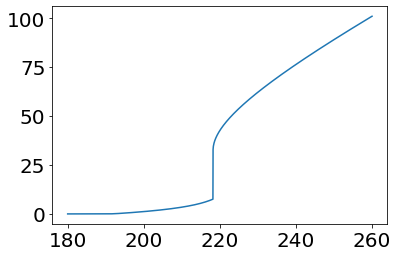

In [133]:
print(len(differences))
print(len(Ns))
print(Ns[differences.index(25.409334403162063)])
print(np.linspace(1,5,5))
plt.plot(Ns,lastpoints)

In [ ]:
a = 0.001
g = 24.3
b = 0.1
p = 0.033
c = 0.018
N = 230

def F(Z,t):
    x1,x2,E = Z
    x1dot = a*x1*x1/(g+x1)*(N-x1-x2-E)-b*x1+c*E
    x2dot = a*x2*x2/(g+x2)*(N-x1-x2-E)-b*x2+c*E
    Edot = a*(x1+x2)*(1-(x1+x2)/(g+x1+x2))*(N-x1-x2-E)-p*E-2*c*E
    return [x1dot,x2dot,Edot]
    #return[a*x1*x1/(g+x1)*(N-x1-x2-E)-b*x1+c*E,a*x2*x2/(g+x2)*(N-x1-x2-E)-b*x2+c*E,a*(x1+x2)*(1-(x1+x2)/(g+x1+x2))*(N-x1-x2-E)-p*E-2*c*E]

    
tvec = np.linspace(0,10000,100000)
y0 = [1,0,0]
zs1 = odeint(F,y0,tvec)
print(zs1[-1,0])

fig = plt.figure()
plt.plot(tvec,zs1[:,0],'b-',label='x1')
plt.plot(tvec,zs1[:,1],'g-',label='x2')
plt.plot(tvec,zs1[:,2],'y-',label='E')
plt.xlabel('time')
plt.ylabel('number of ants')
#plt.xlim([0, 100])
#plt.ylim([0,1])
plt.legend()

N=235
zs2 = odeint(F,y0,tvec)

fig2 = plt.figure()
plt.plot(tvec,zs2[:,0],'b-',label='x1')
plt.plot(tvec,zs2[:,1],'g-',label='x2')
plt.plot(tvec,zs2[:,2],'y-',label='E')
plt.xlabel('time')
plt.ylabel('number of ants')
#plt.xlim([0, 100])
#plt.ylim([0,1])
plt.legend()

fig3 = plt.figure()
plt.plot(zs1[:,0],zs1[:,2])

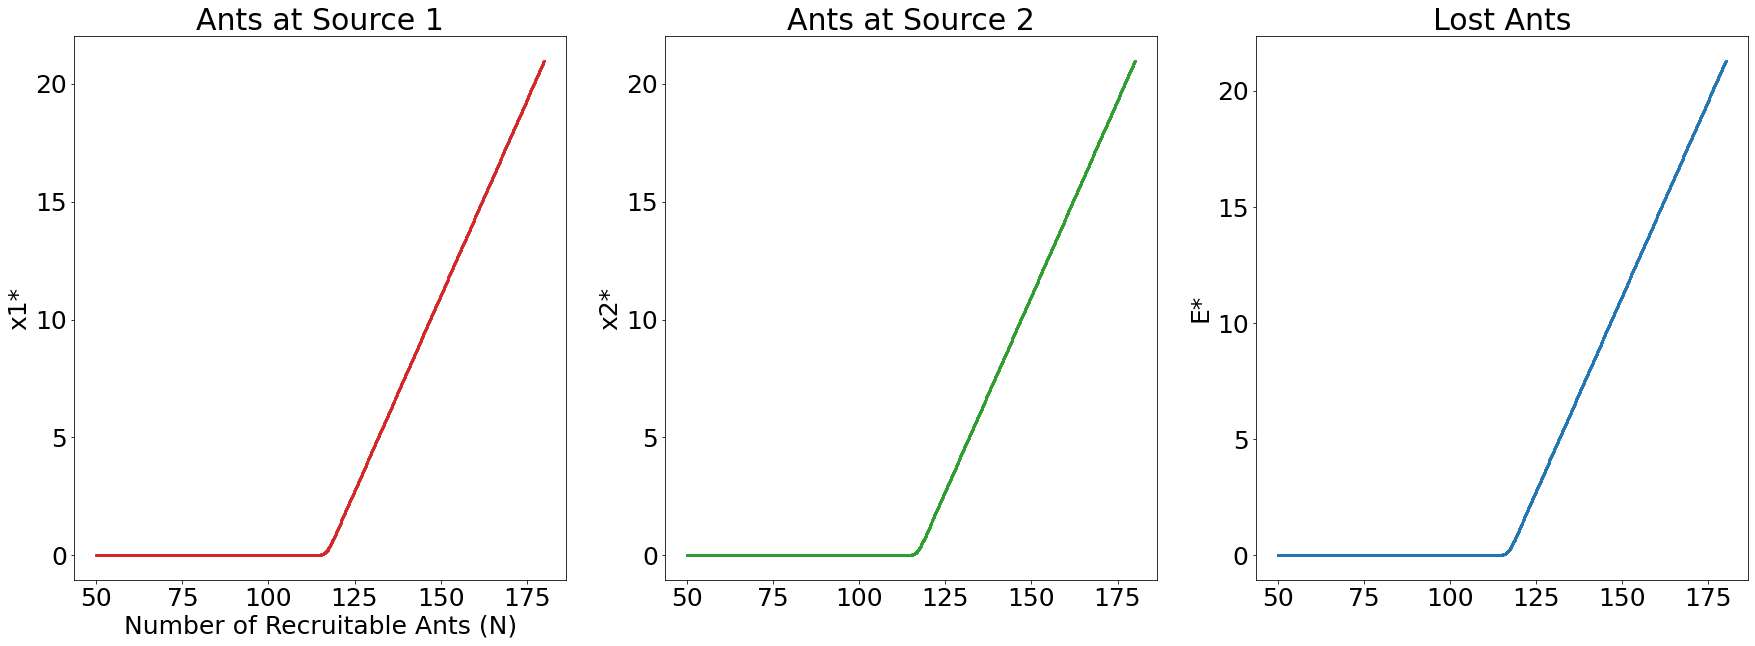

In [114]:
font = {'size' : 25}
matplotlib.rc('font',**font)

f=0.7
def G(Z,t):
    x1,x2,E = Z
    x1dot = a*x1*f*(N-x1-x2-E)-b*x1+c*E
    x2dot = a*x2*f*(N-x1-x2-E)-b*x2+c*E
    Edot = a*(x1+x2)*(1-f)*(N-x1-x2-E)-p*E-2*c*E
    return [x1dot,x2dot,Edot]

tvec = np.linspace(0,3000,5000)
y0 = [10,0,0]

Ns = np.linspace(50,180,1000)

fig,ax = plt.subplots(1,3,figsize=(30,10))

lastpoints = []
for N in Ns:
    zs = odeint(G,y0,tvec)
    
    ax[0].scatter(N*np.ones(100),zs[4900:5000,0],s=0.4, c='tab:red', label='Ants at Source 1')
    ax[1].scatter(N*np.ones(100),zs[4900:5000,1],s=0.4, c='tab:green', label='Ants at Source 2')
    ax[2].scatter(N*np.ones(100),zs[4900:5000,2],s=0.4, c='tab:blue', label='Lost Ants')

ax[0].set_title('Ants at Source 1')
ax[1].set_title('Ants at Source 2')
ax[2].set_title('Lost Ants')
ax[0].set_xlabel('Number of Recruitable Ants (N)')
ax[0].set_ylabel('x1*')
ax[1].set_ylabel('x2*')
ax[2].set_ylabel('E*')
plt.savefig('symm_bifurc')
#plt.legend(["Ants at Source 1","Ants at Source 2","Lost Ants"])
#plt.savefig('y0_1_bif_symm.png')
plt.show()                      # needed in order to actually produce the plot for you to see

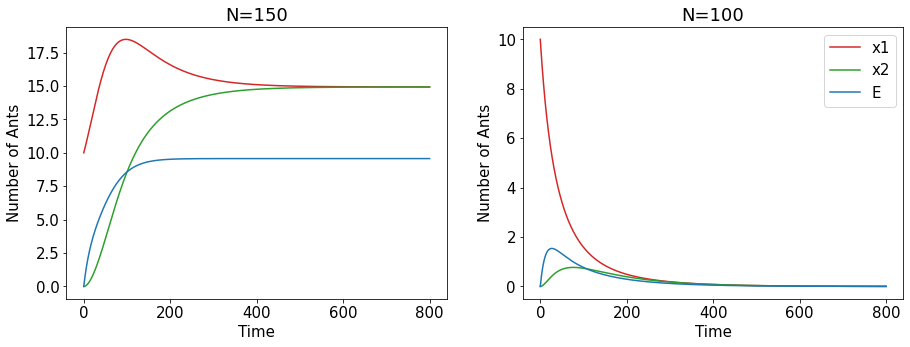

In [117]:
font = {'size' : 15}
matplotlib.rc('font',**font)
f=0.8
N=150
tvec = np.linspace(0,800,50000)
y0 = [10,0,0]
zs = odeint(G,y0,tvec)

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(tvec,zs[:,0],'tab:red',label='x1')
ax[0].plot(tvec,zs[:,1],'tab:green',label='x2')
ax[0].plot(tvec,zs[:,2],'tab:blue',label='E')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Number of Ants')
ax[0].set_title('N=150')
#ax[0].legend()

N=100
zs = odeint(G,y0,tvec)
ax[1].plot(tvec,zs[:,0],'tab:red',label='x1')
ax[1].plot(tvec,zs[:,1],'tab:green',label='x2')
ax[1].plot(tvec,zs[:,2],'tab:blue',label='E')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Number of Ants')
ax[1].set_title('N=100')
ax[1].legend()
plt.savefig('symm_traj')